In [18]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import os
import shutil

In [2]:
def plott(dfs, columns, sufixes, x='Number of env steps total'):
    if len(columns) > 2:
        fig, axs = plt.subplots(2,2)
        figsize = (15, 10)
    else:
        fig, axs = plt.subplots(1,2)
        figsize = (15, 5)

    for j, df in enumerate(dfs):
        if df is not None:
            for i, column in enumerate(columns):
                if len(columns) > 2:
                    axspos = axs[int(i/2), int(i%2)]
                else:
                    axspos = axs[i]
                df.plot.line(x=x, y=column, ax=axspos, figsize=figsize, title=column)
                axspos.legend([column + ' ' + sufix for sufix in sufixes if sufixes])

In [25]:
REMOVE_BELOW_STEPS = 20000
progresses = []
idx = 0

for dirname, _, filenames in os.walk('output'):
    for filename in filenames:
        if 'progress' in filename:
            file = os.path.join(dirname, filename)

            try:
                tempdf = pd.read_csv(file)
            except pd.errors.EmptyDataError as e:
                shutil.rmtree(dirname, ignore_errors=True)
                print('Removed empty folder', dirname)
                continue

            steps = tempdf['Number of env steps total'].iloc[-1]
            if steps < REMOVE_BELOW_STEPS:
                shutil.rmtree(dirname, ignore_errors=True)
                print('Removed small experiment (', steps, ' steps)', dirname)
                continue
                
            progresses.append(file)
            print(idx, steps, progresses[-1])
            idx += 1

0 1128865 output/walker-rand-params/2020_02_07_23_05_18/progress.csv
1 656250 output/pick-place-ml1/2020_02_13_22_39_42/progress.csv
2 123750 output/pick-place-ml1/2020_02_13_21_54_44/progress.csv
3 3116000 output/sparse-point-robot/2020_02_07_01_13_52/progress.csv
4 3036000 output/sparse-point-robot/2020_02_06_00_14_15/progress.csv
5 254156 output/humanoid-dir/2020_02_04_12_53_44/progress.csv
6 655734 output/humanoid-dir/2020_02_05_00_35_33/progress.csv
7 346202 output/dgx-humanoid-dir/2020_02_04_12_53_44/progress.csv


In [26]:
labels = ['PEARL', 'PEARL']
results1 = pd.read_csv(progresses[1], skiprows=[1])
results2 = None # pd.read_csv(progresses[2], skiprows=[1])

if 'Mean Intrinsic Reward' in results1.columns:
    labels[0] = 'Intrinsic'

print('Results 1 steps:', results1['Number of env steps total'].iloc[-1])
if results2 is not None:
    print('Results 2 steps:', results2['Number of env steps total'].iloc[-1])
    if 'Mean Intrinsic Reward' in results2.columns:
        labels[0] = 'Intrinsic'

Results 1 steps: 656250


In [28]:
results1.columns

Index(['Z mean train', 'Z variance train', 'KL Divergence', 'KL Loss',
       'QF Loss', 'VF Loss', 'Policy Loss', 'Q Predictions Mean',
       'Q Predictions Std', 'Q Predictions Max', 'Q Predictions Min',
       'V Predictions Mean', 'V Predictions Std', 'V Predictions Max',
       'V Predictions Min', 'Log Pis Mean', 'Log Pis Std', 'Log Pis Max',
       'Log Pis Min', 'Policy mu Mean', 'Policy mu Std', 'Policy mu Max',
       'Policy mu Min', 'Policy log std Mean', 'Policy log std Std',
       'Policy log std Max', 'Policy log std Min', 'Mean Reward',
       'Decoder Loss', 'Mean Intrinsic Reward', 'Z mean eval',
       'Z variance eval', 'AverageTrainReturn_all_train_tasks',
       'AverageReturn_all_train_tasks', 'AverageReturn_all_test_tasks',
       'Number of train steps total', 'Number of env steps total',
       'Number of rollouts total', 'Train Time (s)',
       '(Previous) Eval Time (s)', 'Sample Time (s)', 'Epoch Time (s)',
       'Total Train Time (s)', 'Epoch'],
      d

In [29]:
print('Total steps', results1['Number of train steps total'][len(results1['Number of train steps total']) - 1])
print('Train time', results1['Total Train Time (s)'][len(results1['Total Train Time (s)']) - 1])

Total steps 588000
Train time 41650.30185441605


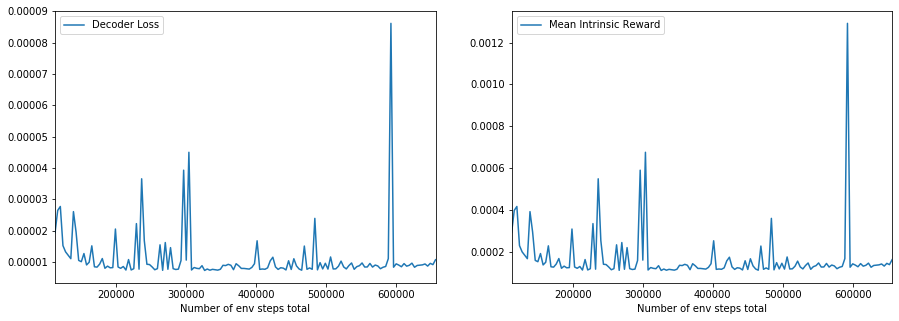

In [30]:
if ('Decoder Loss' in results1.columns and 'Mean Intrinsic Reward' in results1.columns) or \
    (results2 is not None and 'Decoder Loss' in results2.columns and 'Mean Intrinsic Reward' in results2.columns):
    fig, axs = plt.subplots(1, 2)
if 'Decoder Loss' in results1.columns and 'Mean Intrinsic Reward' in results1.columns:
    results1.plot.line(x='Number of env steps total', y='Decoder Loss', ax=axs[0], figsize=(15, 5))
    results1.plot.line(x='Number of env steps total', y='Mean Intrinsic Reward', ax=axs[1])
if results2 is not None and 'Decoder Loss' in results2.columns and 'Mean Intrinsic Reward' in results2.columns:
    results2.plot.line(x='Number of env steps total', y='Decoder Loss', ax=axs[0], figsize=(15, 5))
    results2.plot.line(x='Number of env steps total', y='Mean Intrinsic Reward', ax=axs[1])

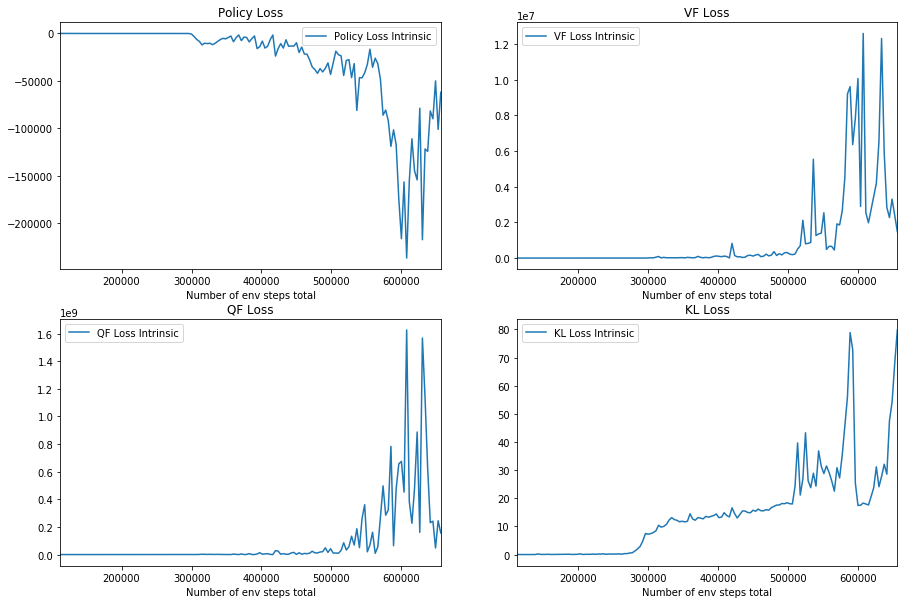

In [31]:
plott([results1, results2], ['Policy Loss', 'VF Loss', 'QF Loss', 'KL Loss'], labels)

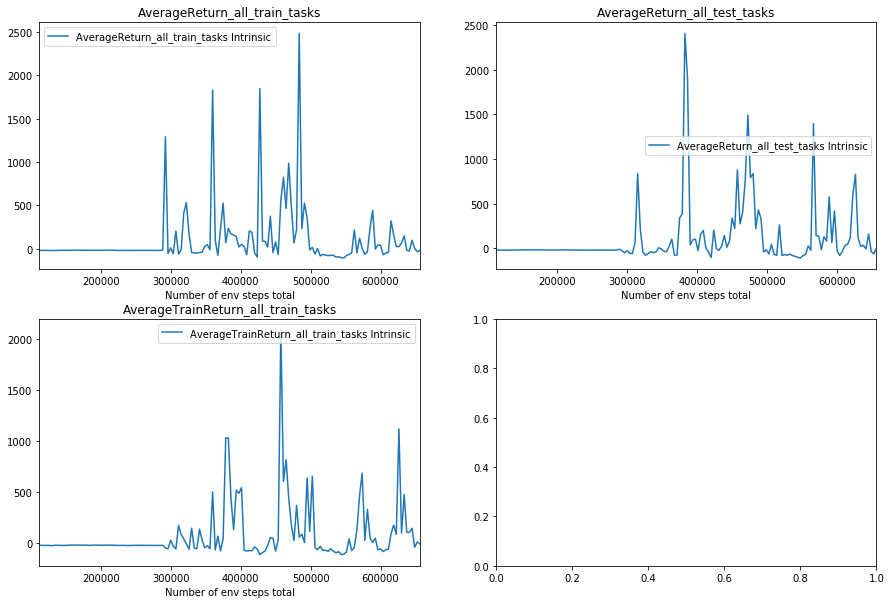

In [33]:
plott([results1, results2], ['AverageReturn_all_train_tasks', 'AverageReturn_all_test_tasks', 'AverageTrainReturn_all_train_tasks'], labels)

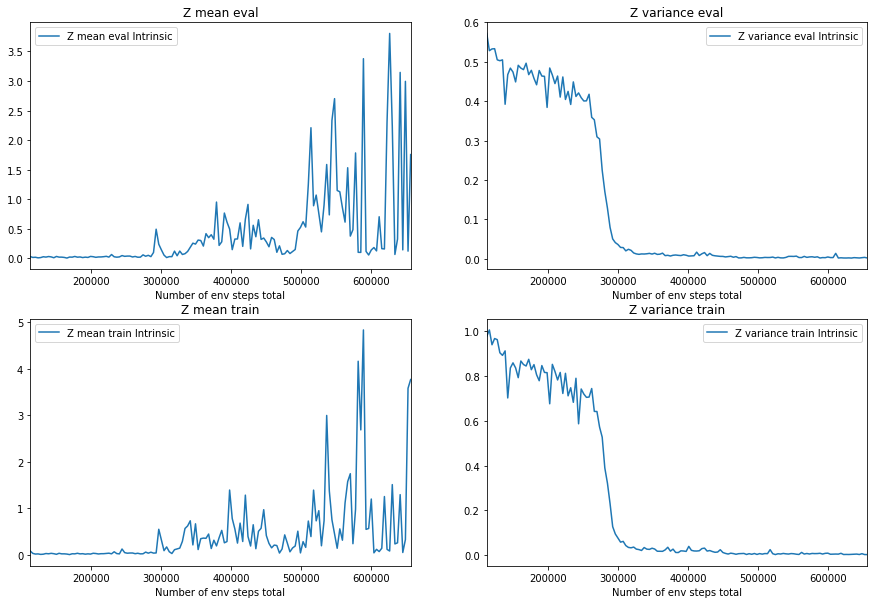

In [34]:
plott([results1, results2], ['Z mean eval', 'Z variance eval', 'Z mean train', 'Z variance train'], labels)

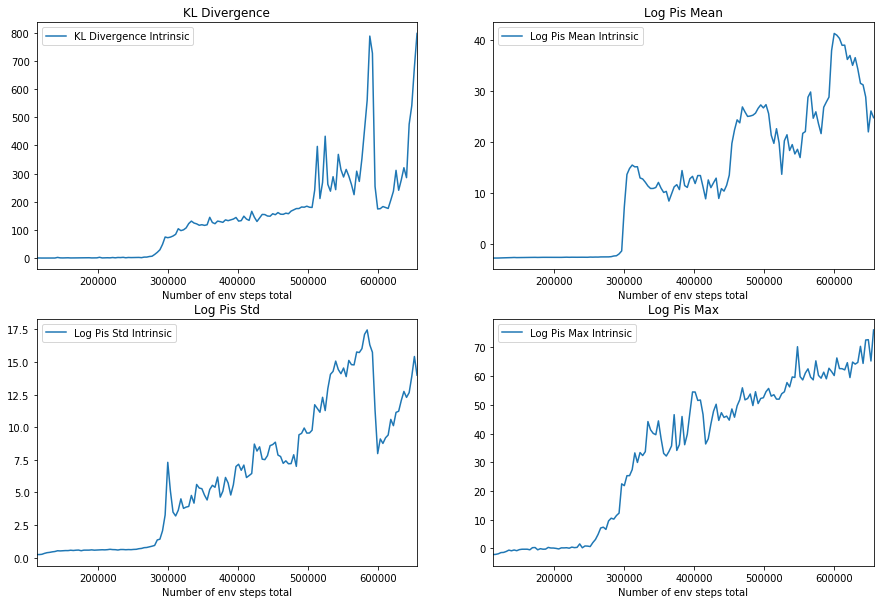

In [35]:
plott([results1, results2], ['KL Divergence', 'Log Pis Mean', 'Log Pis Std', 'Log Pis Max'], labels)

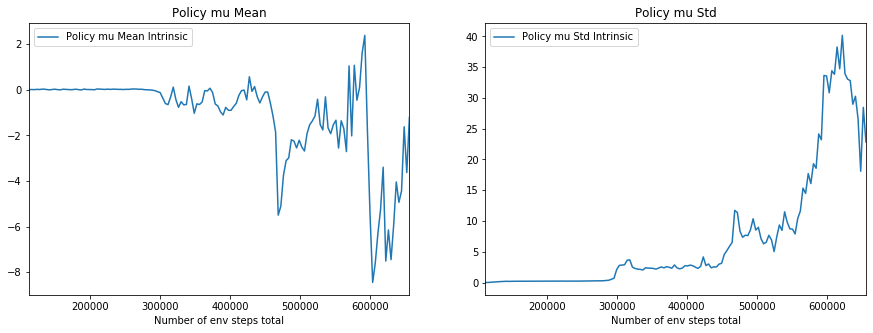

In [36]:
plott([results1, results2], ['Policy mu Mean', 'Policy mu Std'], labels)